# データサイエンス 第3回

In [1]:
# 必要に応じて次の行のコメントアウトを解除し，ライブラリをインストールしてください
!pip install geopandas matplotlib numpy pandas pyserial requests japanize-matplotlib scikit-learn setuptools 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib 
%matplotlib inline 

### 平均値（mean）
$n$ 個の観測値 $x_1, x_2 \dots, x_n$に 対して以下のように定義される値
$$
\begin{aligned}
    \bar{x} &= \frac{x_1+x_2+\cdots + x_n}{n}\\
            &=\frac{1}{n} \sum_{k=1}^{n}x_k
\end{aligned}
$$

#### 平均値の計算の実装例

In [3]:
# 与えられたデータリスト
X = [1, 2, 4, 6, 6, 6, 7, 8]
print("データ：", X)

# データの合計を計算
S = sum(X)
print("合計：", S)

# データの個数を取得
n = len(X)
print("データの数：", n)

# 平均を計算（合計をデータの個数で割る）
mean = S/n
print("平均：", mean)

データ： [1, 2, 4, 6, 6, 6, 7, 8]
合計： 40
データの数： 8
平均： 5.0


#### 平均値の計算の実装例（NumPy）

In [ ]:
X = [1, 2, 4, 6, 6, 6, 7, 8]
mean = np.mean(X)
print("平均値:", mean)

### 中央値（median）

データを小さいものから順に並べたときの，ちょうど中央に位置する値

In [ ]:
X = [1, 2, 4, 6, 6, 6, 7, 8]

# データをソートする
sorted_data = sorted(X)
n = len(sorted_data)

# 要素数が奇数か偶数かで場合分け
if n % 2 == 1:
    # 奇数の場合は中央の要素が中央値
    median = sorted_data[n // 2]
else:
    # 偶数の場合は中央の2つの要素の平均が中央値
    middle1 = sorted_data[n // 2 - 1]
    middle2 = sorted_data[n // 2]
    median = (middle1 + middle2) / 2

print('中央値:', median)

#### 中央値の計算の実装例（NumPy）

In [ ]:
X = [1, 2, 4, 6, 6, 6, 7, 8]
median = np.median(X)
print('中央値:', median)

### 最頻値（mode）
各観測値の中でもっとも頻度が高い観測値

In [ ]:
X = [1, 2, 4, 6, 6, 6, 7, 8]

# 辞書を使って各要素の出現回数をカウント
frequency = {}

for item in X:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1

# 最頻値を見つける
max_count = 0
modes = []

for key, count in frequency.items():
    if count > max_count:
        max_count = count
        modes = [key]
    elif count == max_count:
        modes.append(key)

print("最頻値:", modes)

#### 最頻値の計算の実装例（NumPy）

In [ ]:
X = [1, 2, 4, 6, 6, 6, 7, 8]

# uniqueでユニークな要素とその出現回数を取得
unique, freq = np.unique(X, return_counts=True)

# 出現回数の最大値を取得
max_count = np.max(freq)

# 出現回数が最大の要素を取得（複数ある場合に対応）
modes = unique[freq == max_count]
print("最頻値:", modes)

<span style="font-size: 20px; color: #F08000;">問題1</span>

アヤメの花は花弁や萼片の大きさによって，品種を分類することができる

以下のプログラムでは萼片の長さ(`sepal_length`)に関するデータを取得することができる

この萼片の長さ(`sepal_length`)に関するデータの平均値，中央値，最頻値を計算せよ

また，そのヒストグラムを描画せよ

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
sepal_length = iris_df['sepal length (cm)'].values
print("萼片の長さ (cm)の一覧\n", sepal_length)

萼片の長さ (cm)の一覧
 [5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


キーの表示
- sepal length (cm)：萼片の長さ (cm)
- sepal width (cm)：萼片の幅 (cm)
- petal length (cm)：花弁の長さ (cm)
- petal width (cm)：花弁の幅 (cm)

In [3]:
print(iris_df.keys())

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [4]:
sepal_length = iris_df['sepal length (cm)'].values
sepal_width = iris_df['sepal width (cm)'].values
petal_length = iris_df['petal length (cm)'].values
petal_width = iris_df[ 'petal width (cm)'].values
print("萼片の長さ (cm) の一覧\n", petal_length)

萼片の長さ (cm) の一覧
 [1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.4 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4 4.7 4.5 4.9 4.
 4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1 4.5 3.9 4.8 4.
 4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5 4.7 4.4 4.1 4.
 4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6 5.8 6.6 4.5 6.3
 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9 6.7 4.9 5.7 6.
 4.8 4.9 5.6 5.8 6.1 6.4 5.6 5.1 5.6 6.1 5.6 5.5 4.8 5.4 5.6 5.1 5.1 5.9
 5.7 5.2 5.  5.2 5.4 5.1]


In [8]:
##############################
# 問題1のコードを記入
mean=np.mean(sepal_length)
print(mean)

# データをソートする
sorted_data = sorted(sepal_length)
n = len(sepal_length)

# 要素数が奇数か偶数かで場合分け
if n % 2 == 1:
    # 奇数の場合は中央の要素が中央値
    median = sorted_data[n // 2]
else:
    # 偶数の場合は中央の2つの要素の平均が中央値
    middle1 = sorted_data[n // 2 - 1]
    middle2 = sorted_data[n // 2]
    median = (middle1 + middle2) / 2

print('中央値:', median)

# uniqueでユニークな要素とその出現回数を取得
unique, freq = np.unique(sepal_length, return_counts=True)

# 出現回数の最大値を取得
max_count = np.max(freq)

# 出現回数が最大の要素を取得（複数ある場合に対応）
modes = unique[freq == max_count]
print("最頻値:", modes)
##############################

5.843333333333334
中央値: 5.8
最頻値: [5.]


### 標本平均

/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_16612/1812372238.py:10: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.5)


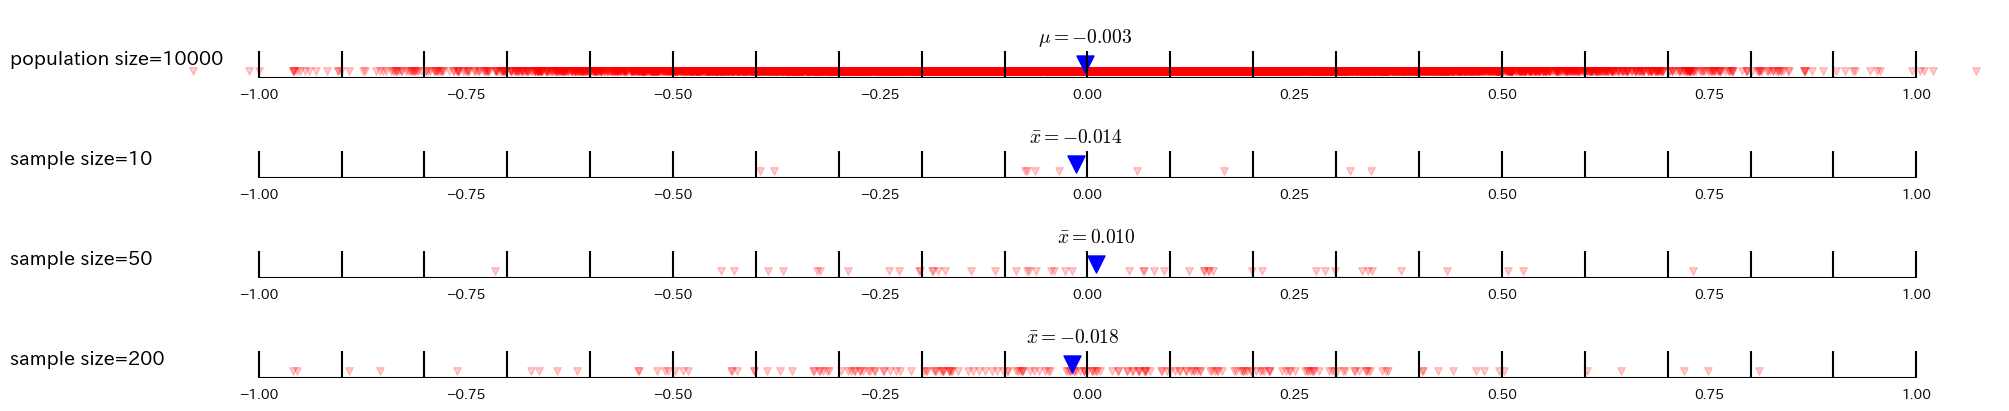

In [9]:
population_size = 10000  # 配列のサイズ
sample_sizes = [10000, 10, 50, 200]  # サンプルサイズをリストに変更
# population = np.random.uniform(-1, 1, population_size)  # 一様分布からのサンプリング
population = np.random.normal(0, 0.3, population_size)  # 正規分布からのサンプリング
population_mean = np.mean(population)

xmin, xmax = -1, 1  # 数直線の最小値・最大値

fig, axes = plt.subplots(nrows=4, figsize=(20, 4), layout='constrained')
fig.subplots_adjust(hspace=0.5)

for i, ax, size in zip(range(len(sample_sizes)), axes, sample_sizes):
    samples = np.random.choice(population, size=size, replace=False)
    sample_mean = np.mean(samples)

    # 点プロット
    ax.scatter(samples, [0.05] * size, marker='v', c='r', s=30, alpha=0.2)
    ax.scatter(sample_mean, 0.1, marker='v', c='b', s=150)

    # 母平均・標本平均の記号
    if i == 0:
        ax.text(population_mean, 0.3, r'$\mu$'+f"$={sample_mean:.3f}$", fontsize=14, ha='center', va='center', math_fontfamily='cm')
        ax.text(xmin-0.3, 0.1, f'population size={size}', size=14)
    else:
        ax.text(sample_mean, 0.3, r'$\bar{x}$'+f"$={sample_mean:.3f}$", fontsize=14, ha='center', va='center', math_fontfamily='cm')
        ax.text(xmin-0.3, 0.1, f'sample size={size}', size=14)

    # 横軸・目盛り線
    ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')  # 横軸
    ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.2, colors='k')  # 目盛り線

    # 軸設定
    ax.tick_params(labelbottom=True, bottom=False, labelleft=False, left=False)  
    ax.set_xlim(xmin - 0.1, xmax + 0.1)
    ax.set_ylim(0, 0.5)
    ax.set_frame_on(False)

plt.show()

## データのバラツキをあらわす統計量


/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_16612/2103418237.py:8: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.7)


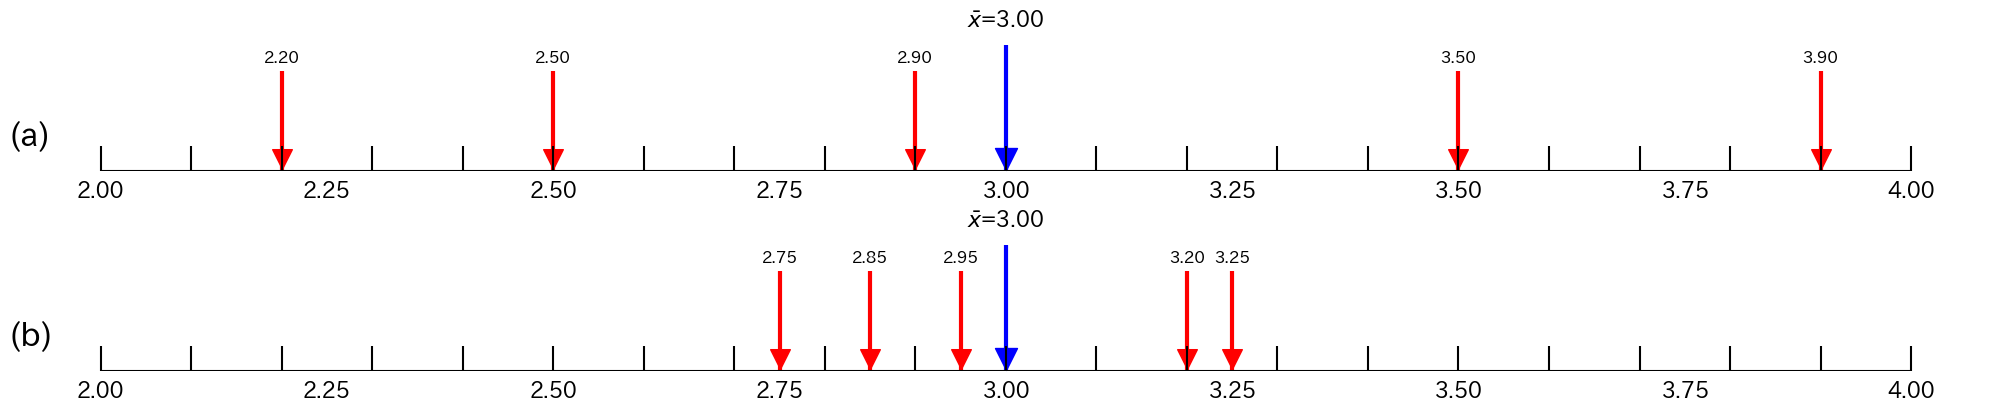

In [10]:
X1 = [2.2, 2.5, 2.9, 3.5, 3.9]
X2 = [2.75, 2.85, 2.95, 3.25, 3.2]

labels = ["(a)", "(b)"]
xmin, xmax = 2, 4  # 数直線の最小値・最大値

fig, axes = plt.subplots(nrows=2, figsize=(20, 4), layout='constrained')
fig.subplots_adjust(hspace=0.7)

for i, ax, samples in zip(range(2), axes, [X1, X2]):
    # サンプルの平均を計算
    sample_mean = np.mean(samples)
    
    # サンプルのプロット
    ax.scatter(samples, [0.05] * len(samples), marker='v', c='r', s=200, alpha=1)
    ax.scatter(sample_mean, 0.05, marker='v', c='b', s=250)
    ax.vlines(x=samples, ymin=0, ymax=0.4, colors='r', linewidth=3) 
    ax.vlines(x=sample_mean, ymin=0, ymax=0.5, colors='b', linewidth=3)  # 目盛り線（大）

    # 平均値と各サンプル点に対するラベル
    ax.text(sample_mean, 0.6, r'$\bar{x}$'+f"={sample_mean:.2f}", fontsize=16, ha='center', va='center')

    for s in samples:
        ax.text(s, 0.45, f"{s:.2f}", fontsize=12, ha='center', va='center')

    # サブプロットのラベル
    ax.text(xmin-0.1, 0.1, labels[i], size=24)

    # 横軸・目盛り線
    ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')  # 横軸
    ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.1, colors='k')  # 目盛り線

    # 軸設定
    ax.tick_params(labelbottom=True, bottom=False, labelleft=False, left=False, labelsize=16)  # x軸設定
    ax.set_xlim(xmin - 0.1, xmax + 0.1)
    ax.set_ylim(0, 0.5)
    ax.set_frame_on(False)

plt.show()

/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_16612/3403459728.py:8: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.7)


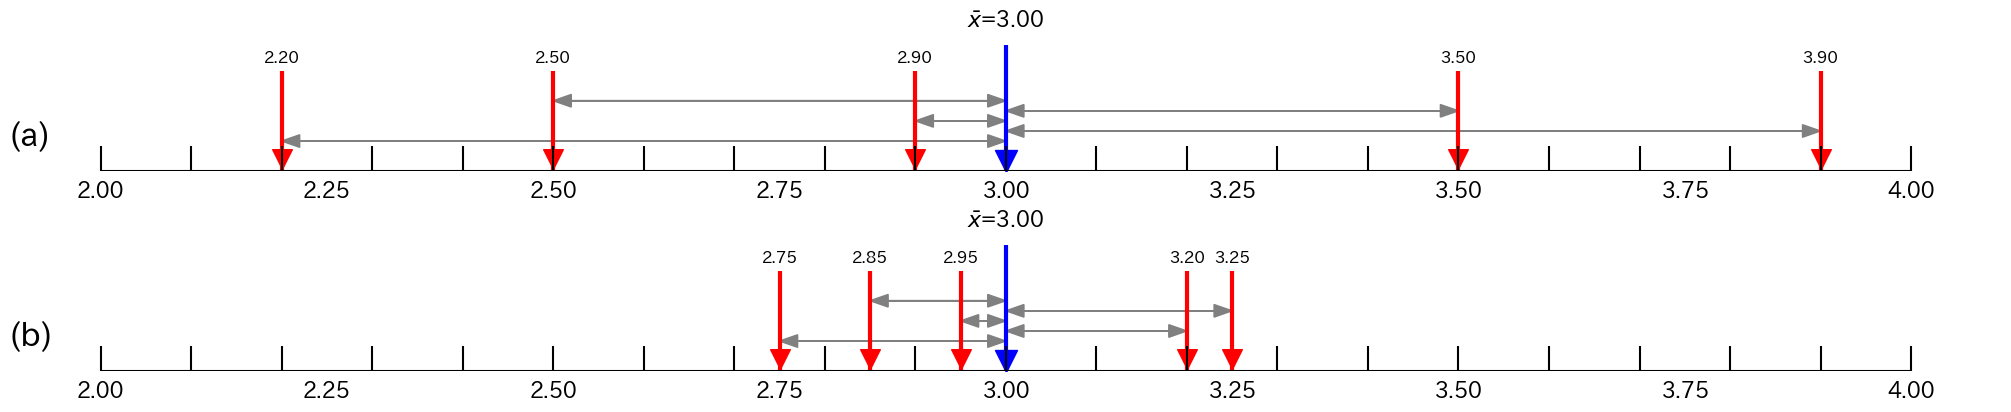

In [11]:
X1 = [2.2, 3.9, 2.9, 3.5,2.5]
X2 = [2.75, 3.2, 2.95, 3.25, 2.85]

labels = ["(a)", "(b)"]
xmin, xmax = 2, 4  # 数直線の最小値・最大値

fig, axes = plt.subplots(nrows=2, figsize=(20, 4), layout='constrained')
fig.subplots_adjust(hspace=0.7)

for i, ax, samples in zip(range(2), axes, [X1, X2]):
    # サンプルの平均を計算
    sample_mean = np.mean(samples)
    
    # サンプルのプロット
    ax.scatter(samples, [0.05] * len(samples), marker='v', c='r', s=200, alpha=1)
    ax.scatter(sample_mean, 0.04, marker='v', c='b', s=250)
    ax.vlines(x=samples, ymin=0, ymax=0.4, colors='r', linewidth=3) 
    ax.vlines(x=sample_mean, ymin=0, ymax=0.5, colors='b', linewidth=3)  # 目盛り線（大）

    # 平均値と各サンプル点に対するラベル
    ax.text(sample_mean, 0.6, r'$\bar{x}$'+f"={sample_mean:.2f}", fontsize=16, ha='center', va='center')

    for s in samples:
        ax.text(s, 0.45, f"{s:.2f}", fontsize=12, ha='center', va='center')

    # 各サンプルから平均までの矢印を描画
    for idx, s in enumerate(samples):
        # 矢印を動的に高さを変える（サンプルに応じて異なる高さに）
        y_offset = 0.12 + idx * 0.04  # 各矢印の高さを少しずつずらす

        # サンプルから平均までの矢印（左向きの矢印）
        ax.arrow(s, y_offset, sample_mean - s, 0, length_includes_head=True, head_width=0.05, head_length=0.02, fc='gray', ec='gray')
        
        # 逆向きの矢印（平均からサンプルへの矢印）
        ax.arrow(sample_mean, y_offset, -(sample_mean - s), 0, length_includes_head=True, head_width=0.05, head_length=0.02, fc='gray', ec='gray')

    # サブプロットのラベル
    ax.text(xmin-0.1, 0.1, labels[i], size=24)

    # 横軸・目盛り線
    ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')  # 横軸
    ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=0.1, colors='k')  # 目盛り線

    # 軸設定
    ax.tick_params(labelbottom=True, bottom=False, labelleft=False, left=False, labelsize=16)  # x軸設定
    ax.set_xlim(xmin - 0.1, xmax + 0.1)
    ax.set_ylim(0, 0.5)
    ax.set_frame_on(False)

plt.show()

### 標本分散の計算例

/var/folders/w0/84vffvq953g73q80qyvcqrf40000gn/T/ipykernel_16612/443369094.py:14: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.5)


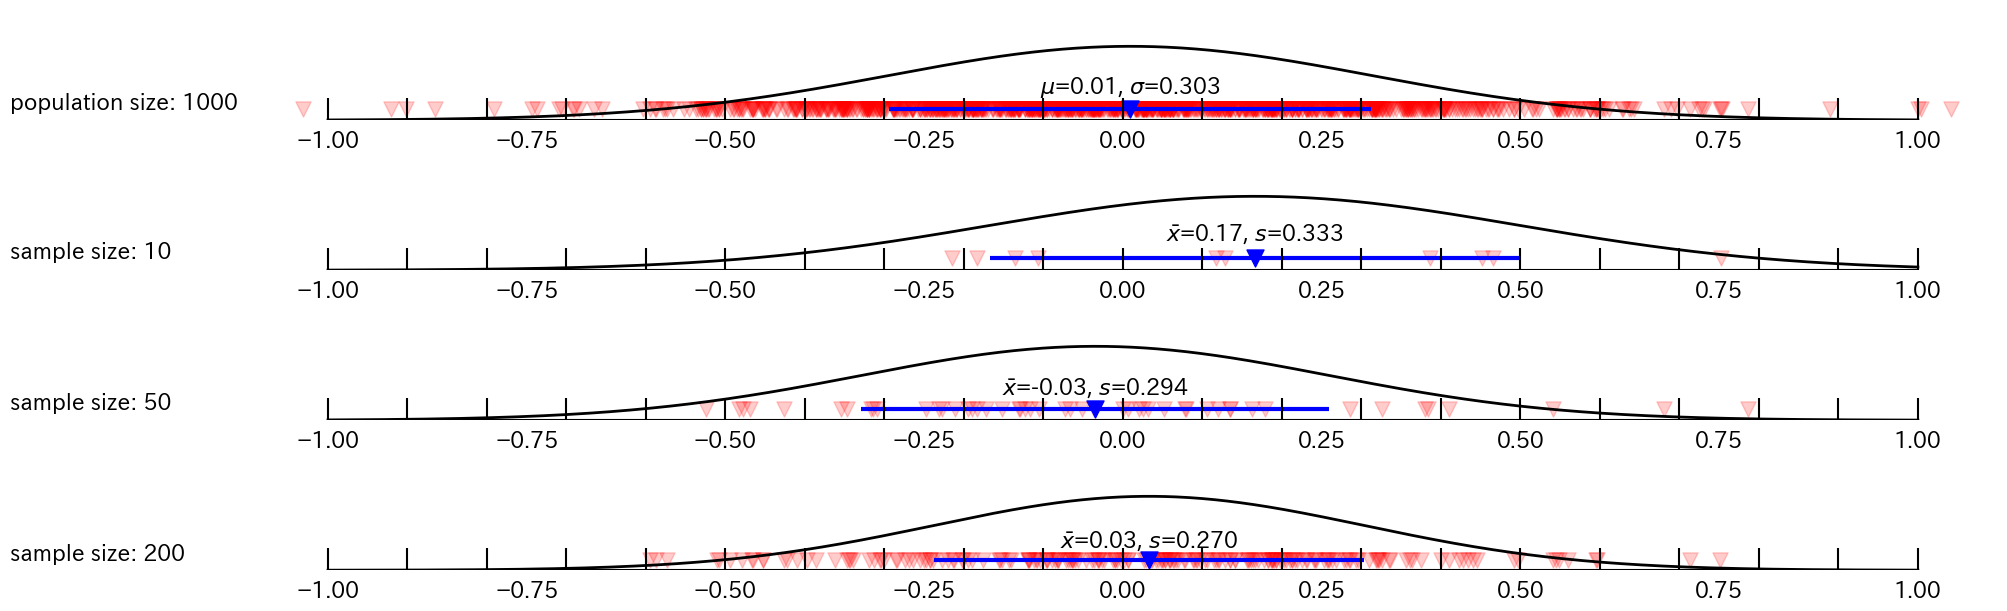

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

population_size = 1000  # 配列のサイズ
sample_sizes = [1000, 10, 50, 200]  # サンプルサイズをリストに変更
# population = np.random.uniform(-1, 1, population_size)  # 一様分布からのサンプリング
population = np.random.normal(0, 0.3, population_size)  # 正規分布からのサンプリング
population_mean = np.mean(population)

xmin, xmax = -1, 1  # 数直線の最小値・最大値

fig, axes = plt.subplots(nrows=4, figsize=(20, 6), layout='constrained')
fig.subplots_adjust(hspace=0.5)

for i, ax, size in zip(range(len(sample_sizes)), axes, sample_sizes):
    samples = np.random.choice(population, size=size, replace=False)
    sample_mean = np.mean(samples)
    
    # 標本標準偏差の計算
    if i == 0:
        s = np.sqrt(np.var(samples, ddof=0))  # 不偏分散でない場合
    else:
        s = np.sqrt(np.var(samples, ddof=1))  # 不偏分散

    # 点プロット
    ax.scatter(samples, [0.1] * size, marker='v', c='r', s=120, alpha=0.2)
    ax.scatter(sample_mean, 0.1, marker='v', c='b', s=150)
    ax.hlines(y=0.1, xmin=-s+sample_mean, xmax=s+sample_mean, colors='b', linewidth=3)  # 標準偏差範囲のライン

    # 正規分布の推定プロット
    x = np.linspace(xmin, xmax, 1000)
    p = stats.norm.pdf(x, sample_mean, s)  # サンプルの平均と標準偏差を使って正規分布を描画
    ax.plot(x, p * 0.5, 'k-', linewidth=2, label="Estimated Normal Distribution")

    # 正規分布の最大値に基づいて縦軸の範囲を調整
    max_pdf = stats.norm.pdf(sample_mean, sample_mean, s) * 0.5
    ax.set_ylim(0, max_pdf * 1.5)  # 最大値に応じて余裕を持たせる

    # 母平均・標本平均の記号
    if i == 0:
        ax.text(xmin-0.4, 0.1, f'population size: {size}', size=16)
        ax.text(population_mean, 0.3, r'$\mu$'+f"={sample_mean:.2f}"+r', $\sigma$'+f"={s:.3f}", fontsize=16, ha='center', va='center')
    else:
        ax.text(xmin-0.4, 0.1, f'sample size: {size}', size=16)
        ax.text(sample_mean, 0.3, r'$\bar{x}$'+f"={sample_mean:.2f}"+r', $s$'+f"={s:.3f}", fontsize=16, ha='center', va='center')

    # 横軸・目盛り線
    ax.hlines(y=0, xmin=xmin, xmax=xmax, colors='k')  # 横軸
    ax.vlines(x=[i / 10 for i in range(xmin * 10, xmax * 10 + 1, 1)], ymin=0, ymax=max_pdf * 0.3, colors='k')  # 目盛り線

    # 軸設定
    ax.tick_params(labelbottom=True, bottom=False, labelleft=False, left=False, labelsize=16)  # x軸設定
    ax.set_xlim(xmin - 0.1, xmax + 0.1)
    ax.set_frame_on(False)

plt.show()

In [13]:
x = [1, 3, 10, 6, 5, 2]
n = len(x)
m = np.mean(x)
v = sum((x-m)**2)/(n-1)
s = np.sqrt(v)

print("標本分散：", round(v, 3))
print("標本標準偏差：", s)

標本分散： 10.7
標本標準偏差： 3.271085446759225


### 実験
標本平均 $\bar{x}$ を使った偏差平方和 $SS$ を $n$で割って求めた標準偏差 $s$ は母平均 $\mu$ を用いて求めた標準偏差 $\sigma$ より小さい値を算出する傾向があることを示す実験

標本平均を使った偏差平方和をnで割って求めた標準偏差の平均: 9.86
標本平均を使った偏差平方和をn-1で割って求めた標準偏差の平均: 10.03
母平均を使った偏差平方和から求めた標準偏差の平均: 10.04


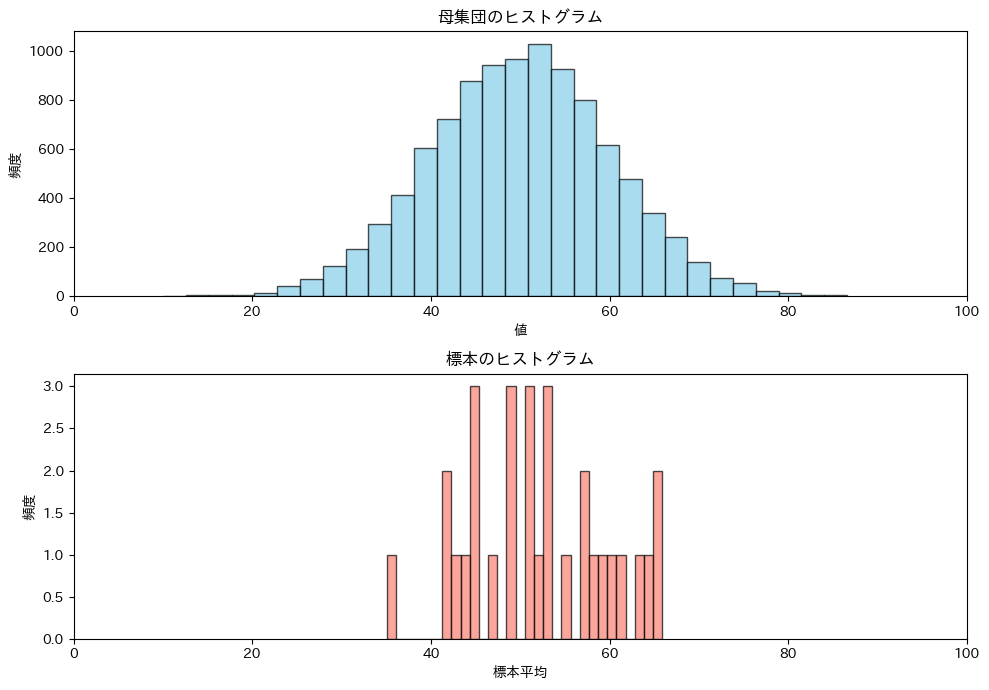

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 母集団のパラメータ
population_size = 10000  # 母集団のサイズ
population_mean = 50     # 母平均
population_std = 10      # 母標準偏差

# 母集団を生成（正規分布に従う）
population = np.random.normal(population_mean, population_std, population_size)

# 標本サイズと試行回数
sample_size = 30   # 各標本のサイズ
num_trials  = 1000 # 試行回数

# 偏差平方和を記録
sums_of_squares_sample_mean = []
sums_of_squares_population_mean = []

# 実験ループ
for _ in range(num_trials):
    sample = np.random.choice(population, sample_size, replace=False)
    sample_mean = np.mean(sample)

    # 母平均を用いた偏差平方和
    sums_of_squares_population_mean.append(np.sum((sample - population_mean) ** 2))
    # 標本平均を用いた偏差平方和
    sums_of_squares_sample_mean.append(np.sum((sample - sample_mean) ** 2))

# 標準偏差の平均を計算
avg_sums_of_squares_sample_mean    = np.mean(np.sqrt(np.array(sums_of_squares_sample_mean) / sample_size))
avg_sums_of_squares_sample_mean_2  = np.mean(np.sqrt(np.array(sums_of_squares_sample_mean) / (sample_size - 1)))
avg_sums_of_squares_population_mean = np.mean(np.sqrt(np.array(sums_of_squares_population_mean) / sample_size))

# 結果表示
print(f"標本平均を使った偏差平方和をnで割って求めた標準偏差の平均: {avg_sums_of_squares_sample_mean:.2f}")
print(f"標本平均を使った偏差平方和をn-1で割って求めた標準偏差の平均: {avg_sums_of_squares_sample_mean_2:.2f}")
print(f"母平均を使った偏差平方和から求めた標準偏差の平均: {avg_sums_of_squares_population_mean:.2f}")

plt.figure(figsize=(10, 7))

# 母集団のヒストグラム
plt.subplot(2, 1, 1)
plt.hist(population, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("母集団のヒストグラム")
plt.xlabel("値")
plt.ylabel("頻度")
plt.xlim(0, 100)

# 標本のヒストグラム（最後に抽出した標本を表示）
plt.subplot(2, 1, 2)
plt.hist(sample, bins=30, color='salmon', edgecolor='black', alpha=0.7)
plt.title("標本のヒストグラム")
plt.xlabel("標本平均")
plt.ylabel("頻度")
plt.xlim(0, 100)

plt.tight_layout()
plt.show()


<span style="font-size: 20px; color: #F08000;">問題2</span>

無作為に選んだ成人男性の身長を測定したところ，以下の通りとなった

| サンプル |  観測値  | 
| ------ | ----- |
| $x_1$  | 176.6 |  
| $x_2$  | 169.1 | 
| $x_3$  | 178.2 | 
| $x_4$  | 169.6 | 
| $x_5$  | 179.1 | 
| $x_6$  | 165.2 | 
| $x_7$  | 161.8 | 
| $x_8$  | 174.3 | 
| $x_9$  | 167.6 | 
| $x_{10}$ | 171.0 | 

1. 以下のデータについて，電卓（手計算でもよい）を使って標本平均 $\bar{x}$，標本分散 $s^2$，標本標準偏差 $s$ を求め，記録せよ
2. NumPyの `np.mean()` 関数および `np.var()` 関数を用いて標本平均 $\bar{x}$，標本分散 $s^2$，標本標準偏差 $s$ を求めよ
ただし，`np.var()`関数では, 引数 `ddof` を `0` とすると分散が $\frac{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}{n}$， `1` とすると $\frac{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}{n-1}$ で計算されることに注意すること
    ```py
    # ddof=0（標本分散ではなく、母集団分散）
    population_variance = np.var(data, ddof=0)

    # ddof=1（標本分散）
    sample_variance = np.var(data, ddof=1)
    ```
3. NumPyを用いずに標本平均 $\bar{x}$，標本分散 $s^2$，標本標準偏差 $s$ を Python プログラミングによって求めよ



In [6]:
##############################
# 問題2のコードを記入
X=np.array([176.6,169.1,178.2,169.6,179.1,165.2,161.8,174.3,167.6,171.0])

mean=np.mean(X)
print(mean)
##############################

171.25
